In [32]:
import numpy as np
from scipy import integrate
import time
import matplotlib.pyplot as plt


-2.0613374827624333e-07


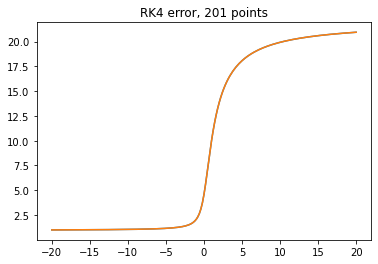

In [33]:

def f(x,y): #y''=-y
    return y/(1+x**2)

def rk4(fun,x,y,h):

    eval = fun(x,y)

    k1=eval*h
    k2=h*fun(x+h/2,y+k1/2)
    k3=h*fun(x+h/2,y+k2/2)
    k4=h*fun(x+h,y+k3)
    y1= y + (k1+2*k2+2*k3+k4)/6

    k5=eval*h/2
    k6=h/2*fun(x+h/4,y+k5/2)
    k7=h/2*fun(x+h/4,y+k6/2)
    k8=h/2*fun(x+h/2,y+k7)
    y2_1= y + (k5+2*k6+2*k7+k8)/6

    k9=fun(x+h/2,y2_1)*h/2
    k10=h/2*fun(x+3*h/4,y2_1+k9/2)
    k11=h/2*fun(x+3*h/4,y2_1+k10/2)
    k12=h/2*fun(x+h,y2_1+k11)
    y2_2 = y2_1 + (k9+2*k10+2*k11+k12)/6

    return y2_2+(y2_2-y1)/15

npt=201
x=np.linspace(-20,20,npt)
y=np.zeros([2,npt])
y[0,0]=1 #starting conditions
y[1,0]=0 #if I start at peak, then first derivative =0
for i in range(npt-1):
    h=x[i+1]-x[i]
    y[:,i+1]= rk4(f,x[i],y[:,i],h)

c = 1/(np.exp(np.arctan(-20)))
truth=c*np.exp(np.arctan(x))


print(np.mean(truth-y[0,:]))

plt.ion()
plt.plot(x,y[0,:])
plt.plot(x,truth)
plt.title('RK4 error, ' + repr(npt)+ ' points')
plt.savefig('rk4_err.png')



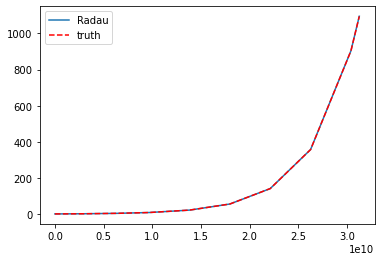

In [111]:
from matplotlib.lines import lineStyles
from pyrsistent import v


def fun(t,y):

    def mid_bateman(r1,r2):
        return y[r1]/lifetime[r1]-y[r2]/lifetime[r2]

    #year is unity 
    hour = 0.000114155
    Gyear = 1e9
    day = 0.00273973
    min = 1.9026e-6
    microsec = 3.171e-14


    lifetime = [
        4.468*Gyear,    # U238
        24.1*day,       # Th234
        6.70*hour,      # Pr234
        245500,        # U234
        75380 ,         # Th230
        1600 ,          # Ra226
        3.8235*day,     # Rn222
        3.1*min,        # Po218
        26.8*min,       # Pb214
        19.9*min,       # Bi214
        164.3*microsec, # Po214
        22.3,           # Pb210
        5.015,          # Bi210
        138376*day      # Po210
        ]
    
    lifetime_lenght = len(lifetime)
    dydt=np.zeros(lifetime_lenght+1)

    dydt[0]=-y[0]/lifetime[0]

    for i in range(1,len(lifetime)):
        dydt[i] = mid_bateman(i-1,i)

    dydt[lifetime_lenght]=y[lifetime_lenght-1]/lifetime[lifetime_lenght-1]
    return dydt


y0=np.zeros(15)
y0[0] = 1

t0=0
t1=7*4.468e9
ans=integrate.solve_ivp(fun,[t0,t1],y0, method="Radau")

truth = np.exp(ans.t/4.468e9)-1


#plt.figure(figsize=(10, 8), dpi=100)
plt.plot(ans.t, truth)
plt.plot(ans.t, ans.y[14]/ans.y[0], color="red", linestyle="--")

plt.legend(["Radau","truth"])
